# Exercícios: Aula 2 – Fundamentos

## Estudante: João Carlos Pandolfi Santana
## Professor: Francisco Zampirolli

Obs.: Os algoritmos deverão ser desenvolvidos no ipython notebook e entregues de forma digital no tidia4 (sugestão: altere este arquivo ipynb). Um único arquivo para os 6 exercícios abaixo.

1. Desenvolva um algoritmo (python) que permita:
    - Ler 3 imagens, de sua escolha, do site (pode ser também de outros sites): http://www.imageprocessingplace.com/root_files_V3/image_databases.htm, uma em níveis de cinza, outra colorida, e uma de sua escolha;
    - Mostrar as imagens recebidas;
    - Determinar o valor médio dos níveis de brilho da imagem em níveis de cinza e o valor médio de cada faixa red, green e blue da imagem colorida;
    - Extrair uma região de 70×100 pixels da imagem colorida e salvar em um arquivo no formato "*.tif";
    - Mostrar a imagem "*.tif";
    - Imprimir as informações da imagem "*.tif".


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Lendo imagens
gray = cv.imread("images/lake.tif",0)
colored = cv.cvtColor(cv.imread("images/peppers_color.tif"), cv.COLOR_BGR2RGB)
other = cv.cvtColor(cv.imread("images/mandril_color.tif"),cv.COLOR_BGR2RGB)

# Exibindo imagens
plt.imshow(gray,"gray")
plt.show()
plt.imshow(colored)
plt.show()
plt.imshow(other)
plt.show()

# Calculando valores medios
def calcMean(img):
    x,y = img.shape
    mean = 0
    for i in range(x):
        for j in range(y):
            mean += img[i,j]
            
    return mean/(x*y)

print("=== Escala de cinza ===")
print("Gray: ",calcMean(gray))


print("=== Imagem colorida ===")
print("R: ",calcMean(colored[0]))
print("G: ",calcMean(colored[1]))
print("B: ",calcMean(colored[2]))

# Extraindo regiao
reg = colored[0:70,0:100]

cv.imwrite("reg.tif",reg)
reg_tif = cv.imread("reg.tif")

print("== Imagem TIF ==")
plt.imshow(reg_tif)
plt.show()

print("== Informacoes da imagem tif ==")
print(reg_tif.dtype)
print(reg_tif.shape)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

=== Escala de cinza ===
Gray:  124.37055206298828
=== Imagem colorida ===
R:  134.31966145833334
G:  132.419921875
B:  130.22721354166666
== Imagem TIF ==


<Figure size 640x480 with 1 Axes>

== Informacoes da imagem tif ==
uint8
(70, 100, 3)


2. Desenvolva um algoritmo (python) que permita:
    - Ler 2 imagens, de sua escolha, em escala de cinza e 8-bits de quantização, do site (pode ser também de outros sites): http://www.imageprocessingplace.com/root_files_V3/image_databases.htm;
    - Mostrar as imagens recebidas;
    - Imprimir as informações das imagens;
    - Modificar a quantização das imagens para 1-bit;
    - Mostrar as imagens resultantes.

== Imagens em escala de cinza ==


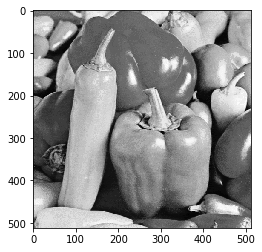

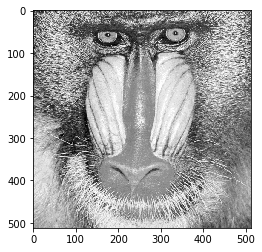

== Informacoes das imagens ==
-> IMG1
(512, 512) uint8
-> IMG2
(512, 512) uint8
== Imgs resultantes ==


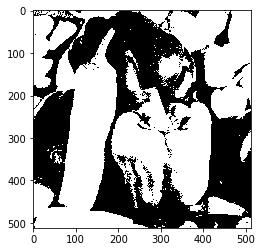

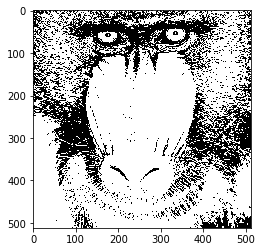

In [2]:
def myThresh(img,thresh):
    x,y = img.shape
    img_result = np.zeros(img.shape)
    for i in range(x):
        for j in range(y):
            if(img[i,j]>thresh):
                img_result[i,j] = 1
    
    return img_result

def readAndConvert(path_img1, path_img2):
    img1 = cv.imread(path_img1,0)
    img2 = cv.imread(path_img2,0)
    
    # Mostrando imagens
    print("== Imagens em escala de cinza ==")
    plt.imshow(img1,"gray")
    plt.show()
    plt.imshow(img2,"gray")
    plt.show()
        
    # Infomacoes
    print("== Informacoes das imagens ==")
    print("-> IMG1")
    print(img1.shape,img1.dtype)
    print("-> IMG2")
    print(img2.shape,img2.dtype)
    
    # Binarizando (modificando quantizacao)
    #img1 = cv.adaptiveThreshold(img1,1,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    #img2 = cv.adaptiveThreshold(img2,1,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    img1= myThresh(img1,100)
    img2= myThresh(img2,100)
    
    return img1, img2


img1 , img2 = readAndConvert("images/peppers_color.tif","images/mandril_color.tif")
 
# Mostrando imagens resultantes
print("== Imgs resultantes ==")
plt.imshow(img1,"gray")
plt.show()
plt.imshow(img2,"gray")
plt.show()



3. Desenvolva um algoritmo (python) que permita:
    - Ler 2 imagens, de sua escolha, em escala de cinza e 8-bits de quantização, do site (pode ser também de outros sites): http://www.imageprocessingplace.com/root_files_V3/image_databases.htm;
    - Mostrar as imagens;
    - Modificar a quantização das imagens para 1-bit;
    - Aplicar as operações lógicas AND e XOR sobre as imagens;
    - Mostrar as imagens resultantes.

== Imagens em escala de cinza ==


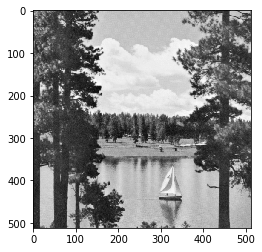

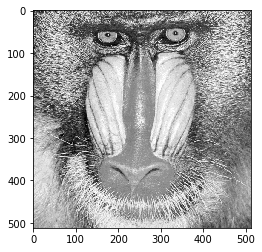

== Informacoes das imagens ==
-> IMG1
(512, 512) uint8
-> IMG2
(512, 512) uint8
== Imgs resultantes ==
AND


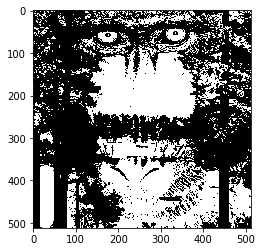

XOR


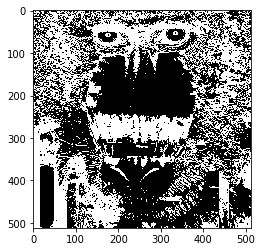

In [3]:
# Exercicio anterior
img1 , img2 = readAndConvert("images/lake.tif","images/mandril_color.tif")

# Aplicando operacoes
img_AND = cv.bitwise_and(img1,img2)
img_XOR = cv.bitwise_xor(img1,img2)

# Mostrando imagens resultantes
print("== Imgs resultantes ==")
print("AND")
plt.imshow(img_AND,"gray")
plt.show()
print("XOR")
plt.imshow(img_XOR,"gray")
plt.show()




4. Desenvolva um algoritmo (python) que permita:
    - Ler 2 imagens, de sua escolha, em escala de cinza e 8-bits de quantização, do site (pode ser também de outros sites): http://www.imageprocessingplace.com/root_files_V3/image_databases.htm;
    - Aumentar o número de amostragem (20%), utilizando os métodos de interpolação bilinear para a primeira imagem e bicubica para a segunda imagem;
    - Aplicar uma subtração entre as imagens resultantes;
    - Mostrar a imagem resultante;
    - Avalie e discuta o resultado.
    Links de auxílio: 
    - http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html 
    - https://www.daniweb.com/programming/software-development/code/216637/resize-an-image-python 

Img resultante


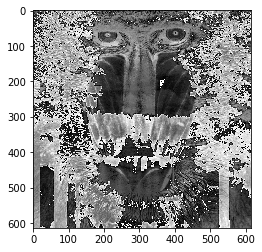

'\n# Consideracoes\n\nAs transformadas nao perderam qualidade, mas diminuíram o "brilho"\n\nNa primeira imagem, utilizando a interpolacao bilinear, as folhas das árvores perderam qualidade\ncomo se um efeito de blur fosse aplicado\n\nNa segunda imagem, utilizando a interpolacao bicubuca, aumentou o granulado no pelo e bigode do macaco\n\n'

In [4]:
def transform(path_img1, path_img2, debug=False):
    # Lendo imagens
    img1 = cv.imread(path_img1,0)
    img2 = cv.imread(path_img2,0)

    if(debug):
        print("Imagens antes de serem convertidas")
        plt.imshow(img1,"gray")
        plt.show()
        plt.imshow(img2,"gray")
        plt.show()
        print("-> IMG1")
        print(img1.shape,img1.dtype)
        print("-> IMG2")
        print(img2.shape,img2.dtype)


    
    # Convertendo
    x1, y1 = img1.shape
    x2, y2 = img2.shape
    img1 = cv.resize(img1, (int(x2*1.2), int(y2*1.2)), interpolation = cv.INTER_LINEAR)
    img2 = cv.resize(img2, (int(x1*1.2), int(y1*1.2)), interpolation = cv.INTER_CUBIC)


    if(debug):
        print("Imagens resultantes")
        plt.imshow(img1,"gray")
        plt.show()
        plt.imshow(img2,"gray")
        plt.show()
        print("-> IMG1")
        print(img1.shape,img1.dtype)
        print("-> IMG2")
        print(img2.shape,img2.dtype)



    
    # Subtraindo
    img_sub = img1 - img2

    # Exibindo
    print("Img resultante")
    plt.imshow(img_sub,"gray")
    plt.show()


transform("images/lake.tif","images/mandril_color.tif", debug=False)


'''
# Consideracoes

As transformadas nao perderam qualidade, mas diminuíram o "brilho"

Na primeira imagem, utilizando a interpolacao bilinear, as folhas das árvores perderam qualidade
como se um efeito de blur fosse aplicado

Na segunda imagem, utilizando a interpolacao bicubuca, aumentou o granulado no pelo e bigode do macaco

'''


5. Calcule o espaço necessário para armazenar uma imagem colorida digital de tamanho 3072×2048 pixels. Observação: imagem colorida requer 3 vezes mais espaço que a imagem em níveis de cinza.

In [5]:
# sua solução
x = 3072
y = 2048
canais = 3
bits = 256

print("resultado: ",y*x*canais*bits, " bits")

resultado:  4831838208  bits


6. Considere:
    - Implemente em python, a fórmula do slide 57. Apresente o tempo de execução para a imagem
Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif - Disponível no link abaixo:
 http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH02_Original_Images.zip.
    - Implemente outras versões desta fórmula tentando melhorar seu desempenho. Justifique porque houve melhoria. 
    - Qual seria a versão mais eficiente de implementação desta fórmula? Justifique.

Tempo execucao  65.23234820365906
Img Original


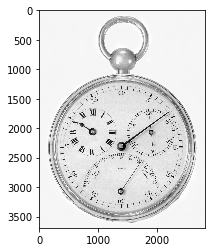

Img resultante


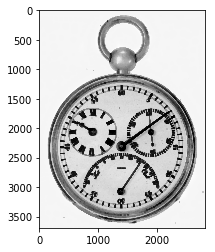

'\nAo utilizar a funcao de menor do numpy, obtive maior desempenho, pelo fato da biblioteca ser mais otimizada\npara lidar com array\n\n62.24 seg contra 965.73\n'

In [26]:

# Agora eu achei o slide :D

def myErode(image,batch_size, debug=False):
    result = np.zeros(image.shape)
    x,y = image.shape
    
    # Percorrendo imagem
    for i in range(x):
        if(debug):
            percent = (i/x)*100
            if(percent%10 == 0):
                print(percent)
        for j in range(y):
            #Recuperando batchs
            boundX1 = i - batch_size
            boundY1 = j - batch_size
            
            boundX2 = i + batch_size
            boundY2 = j + batch_size
            
            # se a borda estourar
            if(boundX1 <0):
                boundX1=0
            
            if(boundY1 < 0):
                boundY1 = 0
        
            if(boundX2 >= x):
                boundX2 = x-1
    
            if(boundY2 >= y):
                boundY2 = y-1
    
    
            # Otimizado
        
            minus = np.min(image[boundX1:boundX2,boundY1:boundY2])
            
            '''
            # Lento
            
            
            minus = 255
            for k in range(boundX1,boundX2):
                for l in range(boundY1, boundY2):
                    if(image[k,l] < minus):
                        minus = image[k,l]
            '''
            result[i,j] = minus
    
    return result
    

import time

    
#img1 = cv.imread("images/Fig0236(a)(letter_T).tif",0)
img1 = cv.imread("images/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif",0)


inicio = time.time()
erodedImage = myErode(img1,10)

fim = time.time()
print("Tempo execucao ", fim - inicio)


print("Img Original")
plt.imshow(img1,"gray")
plt.show()

print("Img resultante")
plt.imshow(erodedImage,"gray")
plt.show()

'''
Ao utilizar a funcao de menor do numpy, obtive maior desempenho, pelo fato da biblioteca ser mais otimizada
para lidar com array

65.23 seg contra 965.73
'''
